# **1. PreTrained 된 YOLOv8 사용**


**1.1 왜 YOLOv8 인가?**

![yolo-comparison-plots[1].png](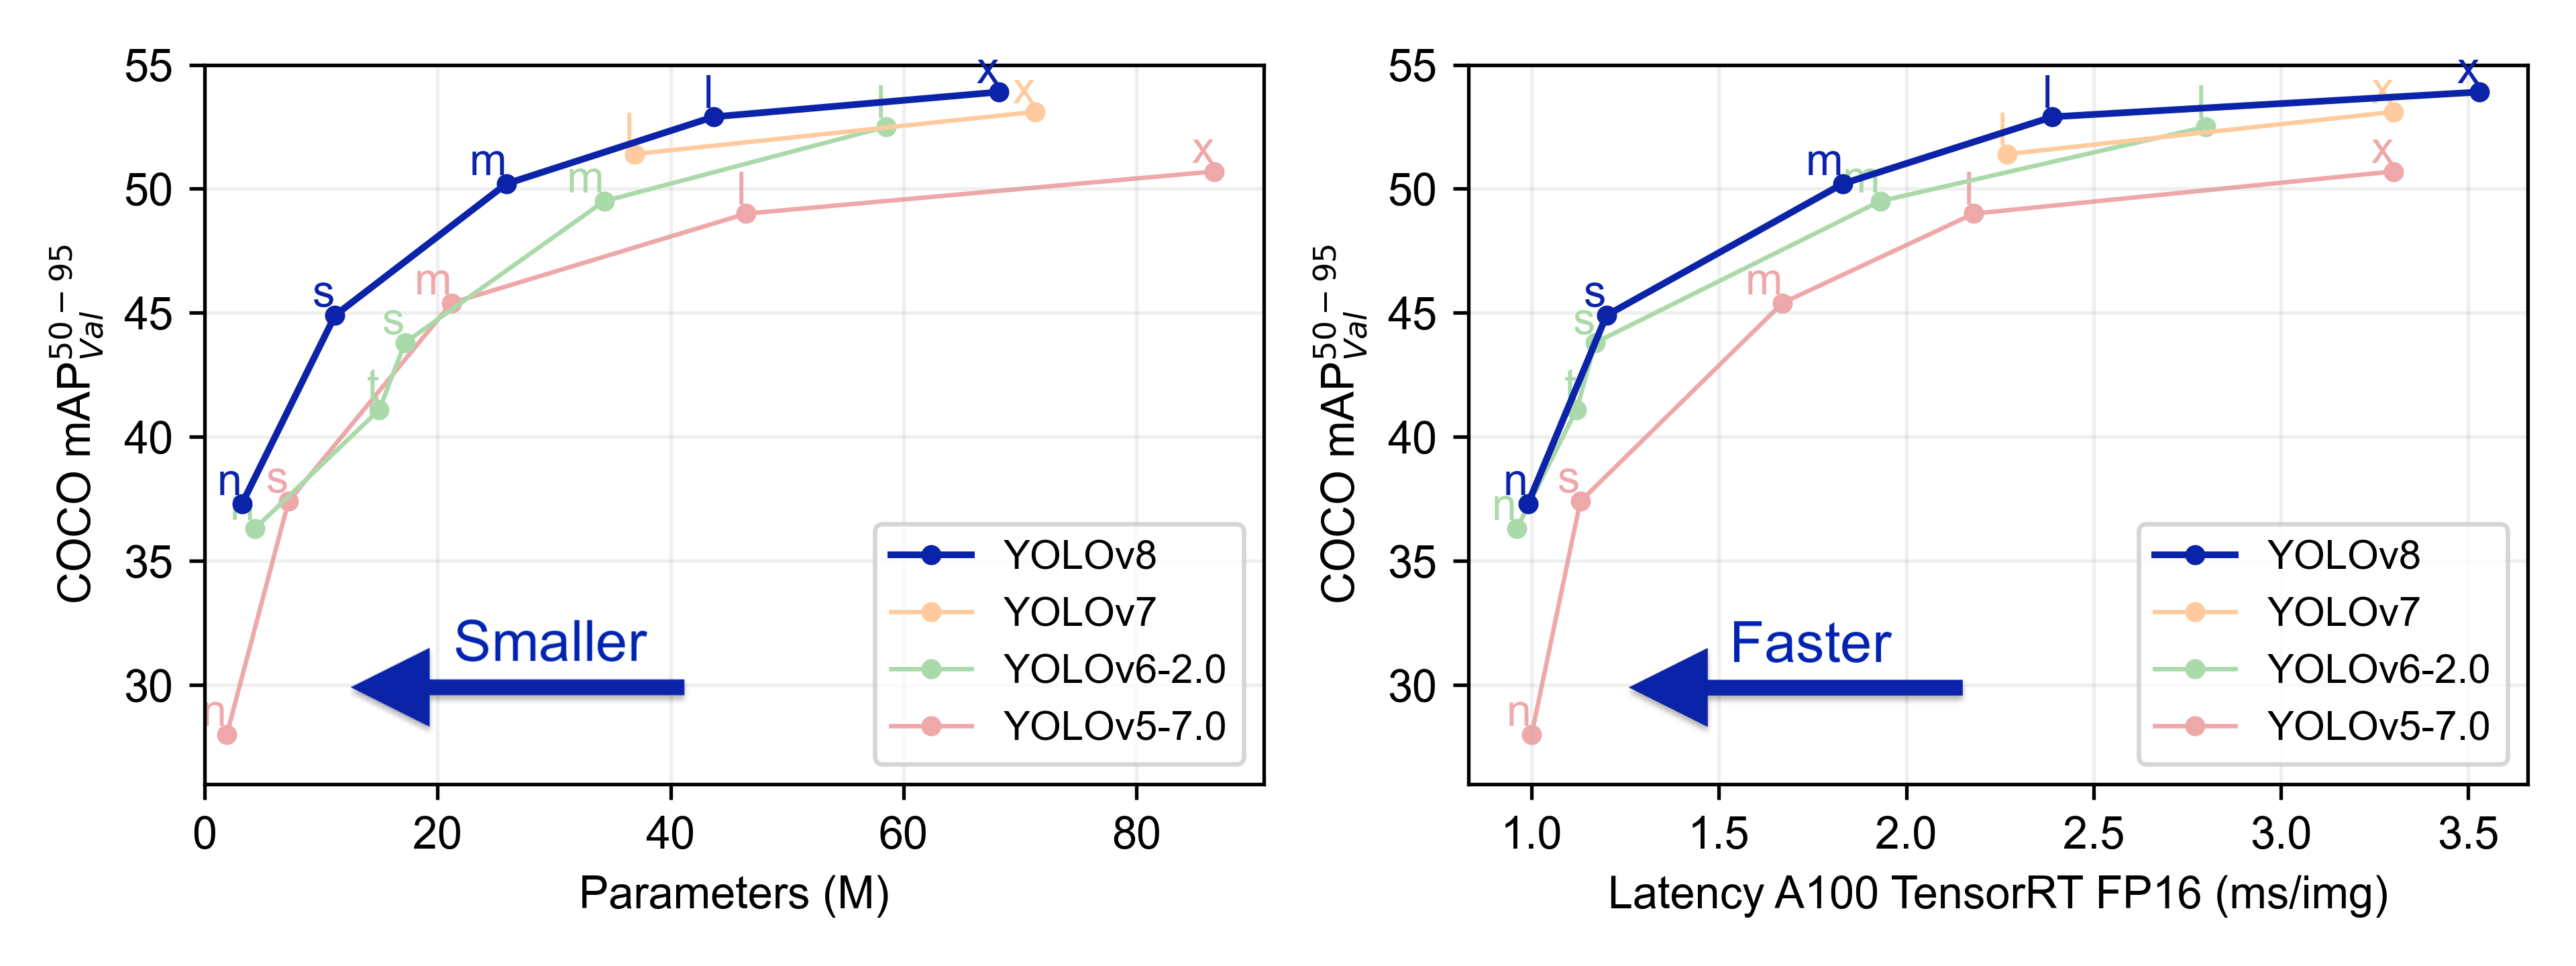)

**1.2 ultraytics에서 제공하는 YOLOv8을 사용하자**
- ultraytics github 참조 : https://github.com/ultralytics/ultralytics

**1.3 YOLOv8을 사용하기 위한 Setup(셋업)**

In [1]:
# ultralytics 설치
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.0/800.0 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


# **2. YOLOv8로 할 수 있는 일**
   - Detect(검출), Segmentation(분할), Tracking(추적), Pose(포즈) 를 수행할 수 있음

![banner-tasks[1].png](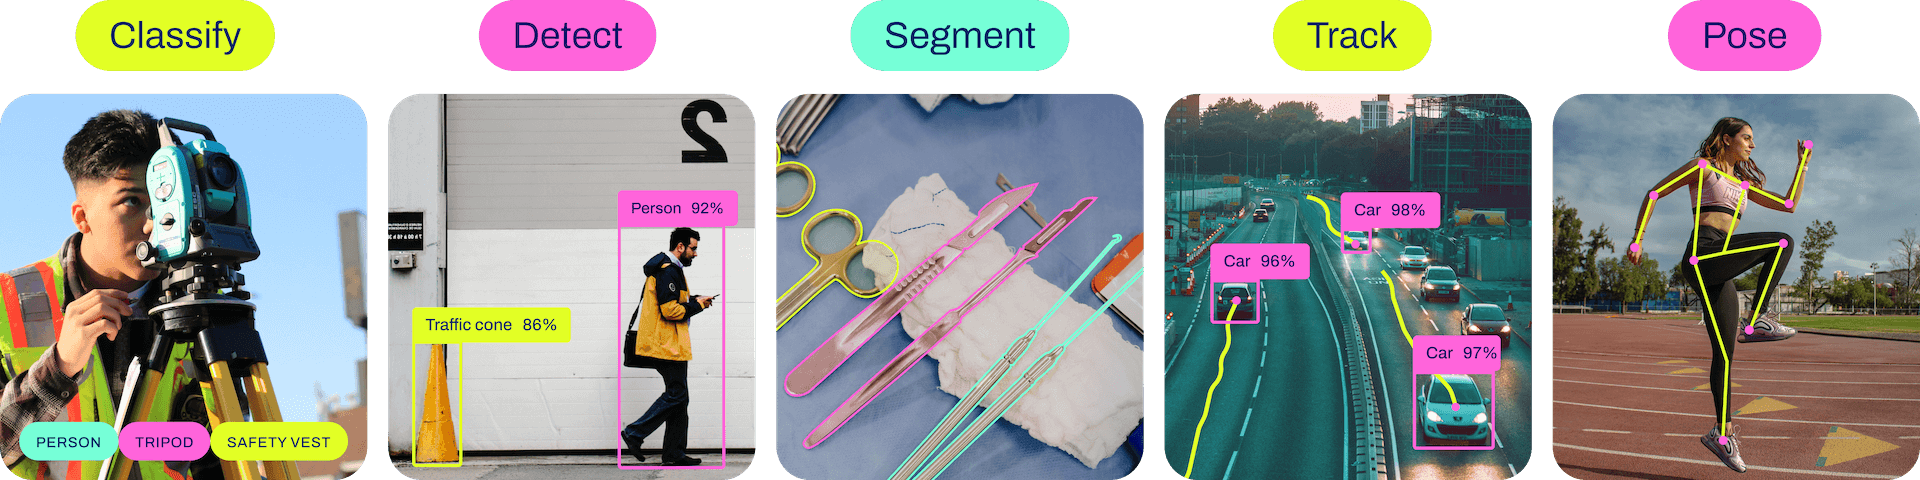)

**2.1 Detection(검출)**
- Detection 모델로 사용할 수 있는 모델의 종류

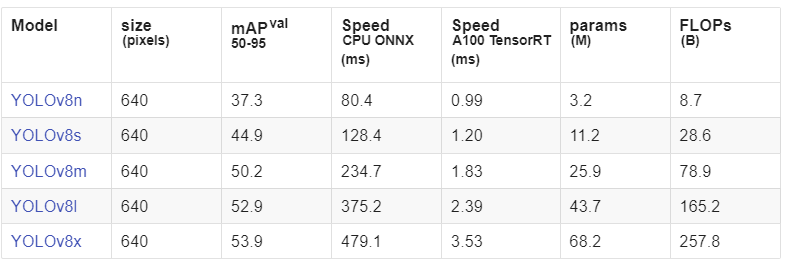

In [3]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n.pt')
# 모델 예측
results = model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 6.25M/6.25M [00:00<00:00, 52.8MB/s]


100%|██████████| 476k/476k [00:00<00:00, 7.58MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 300.7ms
Speed: 19.0ms preprocess, 300.7ms inference, 25.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


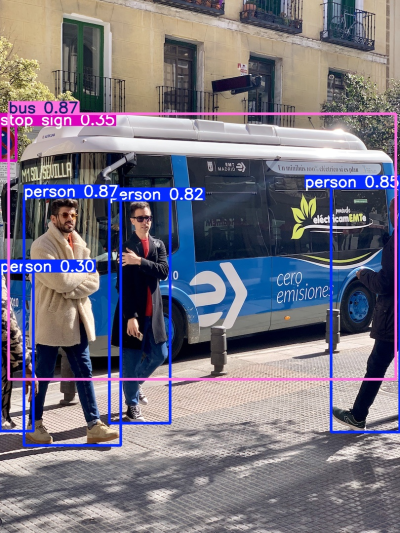

In [4]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/detect/predict/bus.jpg')
fix_width = 400
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

**2.2 Segmentation(분할)**

- Segmentation 모델로 사용할 수 있는 모델의 종류

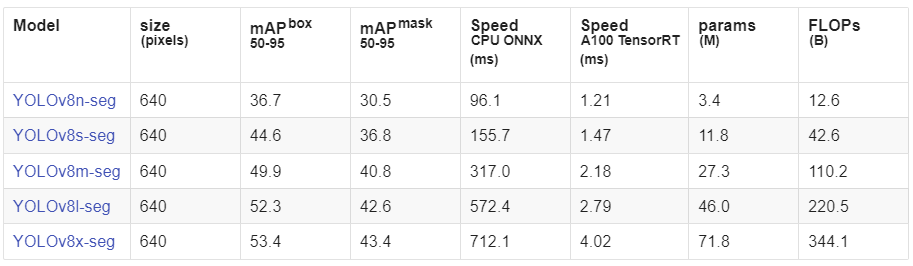

In [5]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n-seg.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n-seg.pt')
# 모델 예측
results = model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 6.74M/6.74M [00:00<00:00, 53.7MB/s]



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 278.3ms
Speed: 4.8ms preprocess, 278.3ms inference, 22.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict


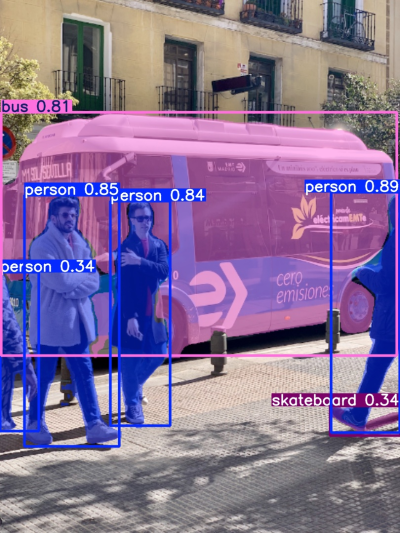

In [6]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/predict/bus.jpg')
fix_width = 400
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

2.3 Pose(포즈)

- Pose 모델로 사용할 수 있는 모델의 종류

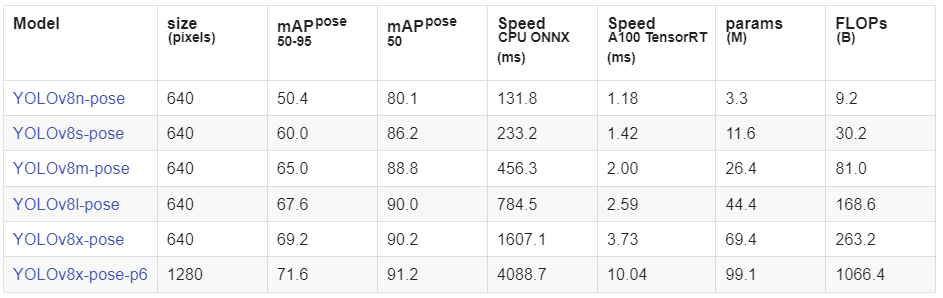

In [7]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n-pose.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n-pose.pt')
# 모델 예측
results = model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 6.52M/6.52M [00:00<00:00, 53.2MB/s]



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 201.0ms
Speed: 4.6ms preprocess, 201.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


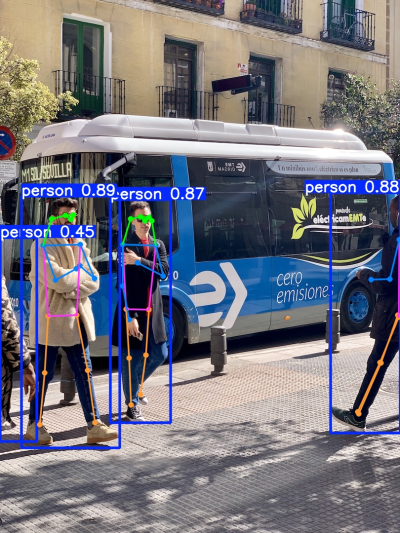

In [8]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/pose/predict/bus.jpg')
fix_width = 400
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

# **3.우리가 원하는 데이터셋으로 YOLOv8 모델을 학습시켜서 Detection(검출), Segmentation(분할), Tracking(추적), Pose(포즈) 를 예측할 수 없을까?**